# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [33]:
weather_df = pd.DataFrame({'City':cities})
weather_df['Country']=''
weather_df["Lat"] = ''
weather_df['Lng'] = ''
weather_df['Max Temp']=''
weather_df['Humidity(%)']=''
weather_df['Cloudiness(%)']=''
weather_df['Wind Speed (mph)']=''
weather_df['Date']=''
weather_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Date
0,fairbanks,,,,,,,,
1,majene,,,,,,,,
2,kangaba,,,,,,,,
3,aksarka,,,,,,,,
4,tasiilaq,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather"
#units="Imperial"
#city_name=city
params = {
    "mode" : "json",
    "appid": weather_api_key,
    "units": "imperial"
    #"q": "Key West"    
}
# url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

record = 0
sets = 1

for index, row in weather_df.iterrows():
    city_name = row['City']
    params['q'] = str(city_name)
    
    response= requests.get(url, params = params)
    response_json = response.json()
    
    
    if response_json['cod'] == 200:
        
        weather_df.loc[index, 'Lat'] = response_json['coord']['lat']
        weather_df.loc[index,'Lng']= response_json['coord']['lon']
        weather_df.loc[index,'Max Temp']= response_json['main']['temp_max']
        weather_df.loc[index,'Humidity(%)']= response_json['main']['humidity']
        weather_df.loc[index,'Cloudiness(%)']= response_json['clouds']['all']
        weather_df.loc[index,'Wind Speed (mph)']= response_json['wind']['speed']
        weather_df.loc[index,'Country']= response_json['sys']['country']
        weather_df.loc[index,'Date']= response_json['dt']
            
        print(f'Processing Record {record} of Set {sets} | {city_name}')
       
    
    else:
        print("Not Found")
    record = record + 1
    
    
    if record == 50:
        record = 1
        sets = sets + 1
    
print("------------------------------\nData Retrieval Complete\n------------------------------")    
    
# print(params)
        

Processing Record 0 of Set 1 | fairbanks
Processing Record 1 of Set 1 | majene
Processing Record 2 of Set 1 | kangaba
Processing Record 3 of Set 1 | aksarka
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | tuktoyaktuk
Not Found
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | port alfred
Not Found
Processing Record 17 of Set 1 | donskoye
Not Found
Processing Record 19 of Set 1 | port lincoln
Not Found
Not Found
Processing Record 22 of Set 1 | bara
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of Set 1 | ponta do sol
Processing Record 25 of Set 1 | mayumba
Processing Record 26 of Set 1 | voznesenskoye
Processing Record 27 of Set 1 | yellowk

In [35]:
response=requests.get(url, params = params )
data=response.json()
data

{'coord': {'lon': -15.21, 'lat': 64.25},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 42.58,
  'feels_like': 35.65,
  'temp_min': 42.58,
  'temp_max': 42.58,
  'pressure': 1003,
  'humidity': 84,
  'sea_level': 1003,
  'grnd_level': 1003},
 'visibility': 10000,
 'wind': {'speed': 7.74, 'deg': 245},
 'clouds': {'all': 100},
 'dt': 1605844207,
 'sys': {'country': 'IS', 'sunrise': 1605865678, 'sunset': 1605887129},
 'timezone': 0,
 'id': 2630299,
 'name': 'Hofn',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Export the city data into a .csv.
weather_df.to_csv("weather.csv")

In [37]:
weather_df=weather_df[["City","Lat","Lng",'Max Temp','Humidity(%)','Cloudiness(%)',"Wind Speed (mph)","Country",'Date']]
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date
0,fairbanks,64.84,-147.72,3.99,75,1,1.12,US,1605844140
1,majene,-3.54,118.97,85.46,69,95,4.7,ID,1605844174
2,kangaba,11.93,-8.42,70.38,34,82,3.02,ML,1605844290
3,aksarka,66.56,67.8,26.19,97,100,18.41,RU,1605844291
4,tasiilaq,65.61,-37.64,35.6,40,100,18.34,GL,1605844139


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,City,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date
0,fairbanks,64.84,-147.72,3.99,75,1,1.12,US,1605844140
1,majene,-3.54,118.97,85.46,69,95,4.7,ID,1605844174
2,kangaba,11.93,-8.42,70.38,34,82,3.02,ML,1605844290
3,aksarka,66.56,67.8,26.19,97,100,18.41,RU,1605844291
4,tasiilaq,65.61,-37.64,35.6,40,100,18.34,GL,1605844139
...,...,...,...,...,...,...,...,...,...
607,tocopilla,-22.09,-70.2,60.33,54,1,6.02,CL,1605844389
608,madimba,-10.4,40.33,78.8,88,75,5.82,TZ,1605844389
609,taltal,-25.4,-70.48,56.95,72,0,1.52,CL,1605844171
610,nova olimpia,-14.8,-57.29,68.14,87,2,2.08,BR,1605844390


,City,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date


SyntaxError: invalid syntax (<ipython-input-50-4e176c57eee8>, line 5)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

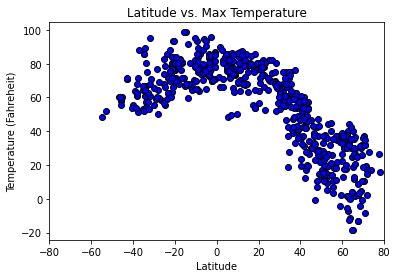

In [53]:
latitude = weather_df["Lat"]
max_temp = weather_df["Max Temp"]
plt.scatter(latitude,max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahreheit)")
plt.xlim(-80,80)
plt.savefig('lat-temp')
plt.show()

## Latitude vs. Humidity Plot

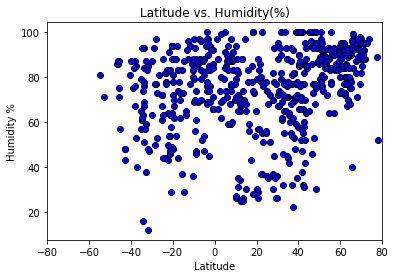

In [56]:
latitude = weather_df["Lat"]
max_temp = weather_df["Humidity(%)"]
plt.scatter(latitude,max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-80,80)
plt.savefig('lat-hum')
plt.show()

## Latitude vs. Cloudiness Plot

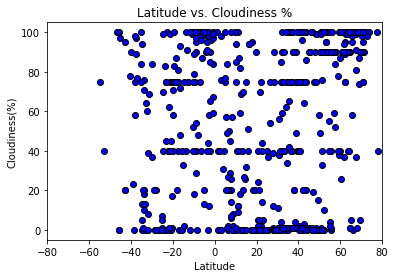

In [58]:
latitude = weather_df["Lat"]
max_temp = weather_df["Cloudiness(%)"]
plt.scatter(latitude,max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,80)
plt.savefig('lat-cloud')
plt.show()

## Latitude vs. Wind Speed Plot

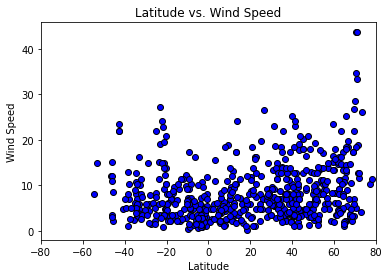

In [61]:
latitude = weather_df["Lat"]
max_temp = weather_df["Wind Speed (mph)"]
plt.scatter(latitude,max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('lat-wind')
plt.xlim(-80,80)
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [65]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df["Lat"] >= 0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date
0,fairbanks,64.84,-147.72,3.99,75,1,1.12,US,1605844140
2,kangaba,11.93,-8.42,70.38,34,82,3.02,ML,1605844290
3,aksarka,66.56,67.8,26.19,97,100,18.41,RU,1605844291
4,tasiilaq,65.61,-37.64,35.60,40,100,18.34,GL,1605844139
5,sao filipe,14.9,-24.5,79.29,65,75,7.27,CV,1605844223


In [67]:
southern_df = weather_df[weather_df["Lat"] < 0]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date
1,majene,-3.54,118.97,85.46,69,95,4.7,ID,1605844174
7,arraial do cabo,-22.97,-42.03,72.12,83,100,19.17,BR,1605844203
8,saldanha,-33.01,17.94,62.60,59,0,4.7,ZA,1605844147
9,bluff,-46.6,168.33,60.01,86,100,11.99,NZ,1605844161
10,busselton,-33.65,115.33,66.99,76,76,8.01,AU,1605844234


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'cities_data' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [73]:
x_values = southern_df['Max Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pbalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-75),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (C)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(25,100)
plt.ylim(5, -85)
plt.savefig('max_lat_s')
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [71]:
x_values = northern_df['Humidity(%)']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(7,102)
plt.ylim(-5, 85)
plt.savefig('hum_lat_n')
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


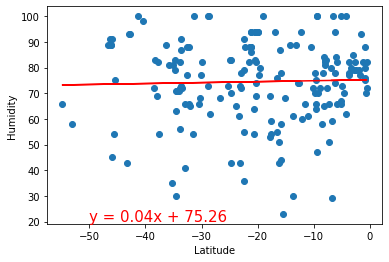

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


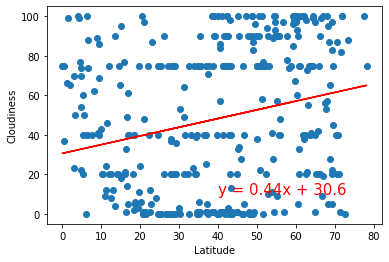

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


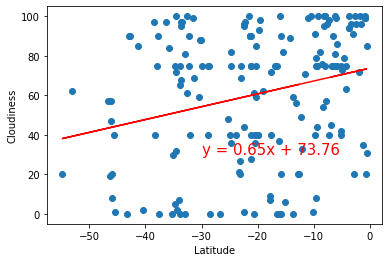

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


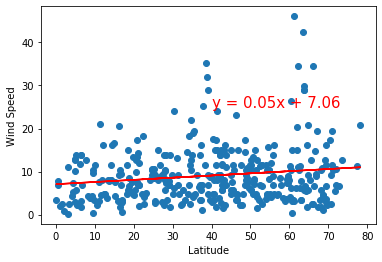

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


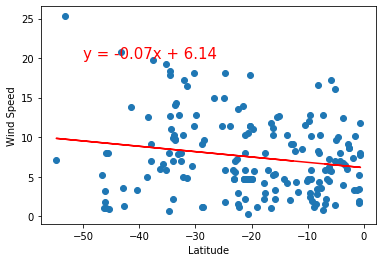